In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
pip install openpyxl 

Note: you may need to restart the kernel to use updated packages.


In [3]:
def checkLatestVersion():
    if(os.path.exists("./dly532.csv")):
        os.remove("./dly532.csv")
        print("Deleted previous CSV file.")
        print("Downloading latest CSV file.")
        os.system("wget https://cli.fusio.net/cli/climate_data/webdata/dly532.csv")
        print("Downloaded dataset.")
    else:
        print("Downloading dataset.")
        os.system("wget https://cli.fusio.net/cli/climate_data/webdata/dly532.csv")
        print("Downloaded dataset.")
    return None

In [4]:
checkLatestVersion()

Deleted previous CSV file.
Downloaded dataset.


In [5]:
with open("dly532.csv", "r") as reading:
    data = reading.read().splitlines(True)
reading.close()
os.remove("./dly532.csv")
with open("dly532.csv", "w") as writing:
    writing.writelines(data[26:])
writing.close()

# Reading the raw dataset

In [6]:
names = ["DATE", "INDICATOR0","MAX_AIR_TEMP",
           "INDICATOR1","MIN_AIR_TEMP","I_GRASS_MIN_TEMP",
           "GRASS_MIN_TEMP","INDICATOR2","RAIN_MM",
           "MEAN_CBL_PRESSURE","MEAN_WINDSPEED_KNOT","INDICATOR3",
           "HIGHEST_10MIN_WINDSPEED","INDICATOR4","WIND_DIR_DEGREE",
           "INDICATOR5","HIGHEST_GUST","SUN_DURATION","DOS",
           "GLOBAL_RADIATION","SOIL_TEMP","POTENTIAL_EVAPOTRANSPIRATION",
           "EVAPORATION","SMD_WELL_DRAINED","SMD_MODERATELY_DRAINED","SMD_POORLY_DRAINED"]
read_data = pd.read_csv("dly532.csv", names = names)
read_data

,DATE,INDICATOR0,MAX_AIR_TEMP,INDICATOR1,MIN_AIR_TEMP,I_GRASS_MIN_TEMP,GRASS_MIN_TEMP,INDICATOR2,RAIN_MM,MEAN_CBL_PRESSURE,...,HIGHEST_GUST,SUN_DURATION,DOS,GLOBAL_RADIATION,SOIL_TEMP,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED
0,01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,0,7.5,0,1.3,0,1.1,3,0.0,1011.1,...,14,0.0,0,203,5.375,0.2,0.3,0.4,0.4,-8.6
28820,27-nov-2020,0,7.9,1,-1.2,1,-5.5,0,0.2,1008.2,...,12,4.7,0,345,4.975,0.1,0.2,0.3,0.3,-8.3
28821,28-nov-2020,0,10.2,0,0.6,1,-3.7,3,0.0,1008.3,...,15,0.6,0,222,4.800,0.3,0.4,0.6,0.6,-7.6
28822,29-nov-2020,0,10.8,0,1.9,1,-0.8,3,0.0,1015.1,...,14,1.9,0,198,6.650,0.2,0.3,0.8,0.8,-7.0


# Pre-processing the data.

Removing empty values and the old rows with irrelevant data (till 28-oct-1979).

In [7]:
read_data = pd.read_csv("dly532.csv", names = names)
read_data = read_data.replace(r'^\s*$', np.nan, regex=True)
read_data = read_data[read_data["SMD_POORLY_DRAINED"].notna()]
read_data

,DATE,INDICATOR0,MAX_AIR_TEMP,INDICATOR1,MIN_AIR_TEMP,I_GRASS_MIN_TEMP,GRASS_MIN_TEMP,INDICATOR2,RAIN_MM,MEAN_CBL_PRESSURE,...,HIGHEST_GUST,SUN_DURATION,DOS,GLOBAL_RADIATION,SOIL_TEMP,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED
13814,28-oct-1979,0,12.0,0,4.5,1,-1.9,0,0.9,997.9,...,22,4.2,0,573,9.350,0.7,0.9,0.0,-0.2,-0.2
13815,29-oct-1979,0,11.0,0,4.0,0,2.7,0,0.7,998.8,...,17,0.4,0,417,8.625,0.6,0.8,0.0,-0.1,-0.3
13816,30-oct-1979,0,15.7,0,8.8,0,7.4,0,4.8,990.8,...,36,0.6,0,247,10.550,0.8,1.0,0.0,-4.0,-4.4
13817,31-oct-1979,0,12.6,0,7.1,0,5.3,0,0.5,990.0,...,37,6.7,0,577,9.875,1.0,1.2,0.5,0.5,-3.7
13818,01-nov-1979,0,11.4,0,5.5,0,4.0,2,0.0,1001.6,...,27,7.0,0,585,8.175,1.2,1.5,1.6,1.6,-2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,0,7.5,0,1.3,0,1.1,3,0.0,1011.1,...,14,0.0,0,203,5.375,0.2,0.3,0.4,0.4,-8.6
28820,27-nov-2020,0,7.9,1,-1.2,1,-5.5,0,0.2,1008.2,...,12,4.7,0,345,4.975,0.1,0.2,0.3,0.3,-8.3
28821,28-nov-2020,0,10.2,0,0.6,1,-3.7,3,0.0,1008.3,...,15,0.6,0,222,4.800,0.3,0.4,0.6,0.6,-7.6
28822,29-nov-2020,0,10.8,0,1.9,1,-0.8,3,0.0,1015.1,...,14,1.9,0,198,6.650,0.2,0.3,0.8,0.8,-7.0


Checking the data types of each column.

In [8]:
read_data.dtypes

DATE                             object
INDICATOR0                        int64
MAX_AIR_TEMP                    float64
INDICATOR1                        int64
MIN_AIR_TEMP                    float64
I_GRASS_MIN_TEMP                  int64
GRASS_MIN_TEMP                   object
INDICATOR2                        int64
RAIN_MM                         float64
MEAN_CBL_PRESSURE               float64
MEAN_WINDSPEED_KNOT             float64
INDICATOR3                        int64
HIGHEST_10MIN_WINDSPEED          object
INDICATOR4                        int64
WIND_DIR_DEGREE                  object
INDICATOR5                        int64
HIGHEST_GUST                     object
SUN_DURATION                    float64
DOS                              object
GLOBAL_RADIATION                 object
SOIL_TEMP                        object
POTENTIAL_EVAPOTRANSPIRATION    float64
EVAPORATION                      object
SMD_WELL_DRAINED                 object
SMD_MODERATELY_DRAINED           object


Removing columns not related to the problem statement.

In [9]:
try:
    read_data = read_data.drop(columns = ["I_GRASS_MIN_TEMP","GRASS_MIN_TEMP",
                                          "INDICATOR2","GLOBAL_RADIATION","DOS",
                                          "SOIL_TEMP","INDICATOR0","INDICATOR1",
                                          "INDICATOR2","INDICATOR3","INDICATOR4","INDICATOR5"])
except:
    print("Re-run previous cell.")

read_data

,DATE,MAX_AIR_TEMP,MIN_AIR_TEMP,RAIN_MM,MEAN_CBL_PRESSURE,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED
13814,28-oct-1979,12.0,4.5,0.9,997.9,8.8,16,280,22,4.2,0.7,0.9,0.0,-0.2,-0.2
13815,29-oct-1979,11.0,4.0,0.7,998.8,8.2,12,240,17,0.4,0.6,0.8,0.0,-0.1,-0.3
13816,30-oct-1979,15.7,8.8,4.8,990.8,14.3,24,210,36,0.6,0.8,1.0,0.0,-4.0,-4.4
13817,31-oct-1979,12.6,7.1,0.5,990.0,13.5,24,250,37,6.7,1.0,1.2,0.5,0.5,-3.7
13818,01-nov-1979,11.4,5.5,0.0,1001.6,12.5,19,240,27,7.0,1.2,1.5,1.6,1.6,-2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,7.5,1.3,0.0,1011.1,5.5,10,270,14,0.0,0.2,0.3,0.4,0.4,-8.6
28820,27-nov-2020,7.9,-1.2,0.2,1008.2,3.0,7,140,12,4.7,0.1,0.2,0.3,0.3,-8.3
28821,28-nov-2020,10.2,0.6,0.0,1008.3,6.3,11,80,15,0.6,0.3,0.4,0.6,0.6,-7.6
28822,29-nov-2020,10.8,1.9,0.0,1015.1,4.4,10,280,14,1.9,0.2,0.3,0.8,0.8,-7.0


In [10]:
read_data.loc[read_data["RAIN_MM"] == 0, "RAIN_BOOLEAN"] = 0
read_data.loc[read_data["RAIN_MM"] > 0, "RAIN_BOOLEAN"] =  1

In [11]:
read_data.tail(5)

,DATE,MAX_AIR_TEMP,MIN_AIR_TEMP,RAIN_MM,MEAN_CBL_PRESSURE,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED,RAIN_BOOLEAN
28819,26-nov-2020,7.5,1.3,0.0,1011.1,5.5,10,270,14,0.0,0.2,0.3,0.4,0.4,-8.6,0.0
28820,27-nov-2020,7.9,-1.2,0.2,1008.2,3.0,7,140,12,4.7,0.1,0.2,0.3,0.3,-8.3,1.0
28821,28-nov-2020,10.2,0.6,0.0,1008.3,6.3,11,80,15,0.6,0.3,0.4,0.6,0.6,-7.6,0.0
28822,29-nov-2020,10.8,1.9,0.0,1015.1,4.4,10,280,14,1.9,0.2,0.3,0.8,0.8,-7.0,0.0
28823,30-nov-2020,10.2,2.8,0.7,1015.2,10.6,19,270,28,0.0,0.4,0.5,0.4,0.4,-7.0,1.0


### Coverting object to float data types

In [12]:
read_data['DATE'] = read_data['DATE'].astype('datetime64[ns]')
read_data['HIGHEST_10MIN_WINDSPEED'] = read_data['HIGHEST_10MIN_WINDSPEED'].astype(float)
read_data['WIND_DIR_DEGREE'] = read_data['WIND_DIR_DEGREE'].astype(float)
read_data['HIGHEST_GUST'] = read_data['HIGHEST_GUST'].astype(float)
read_data['EVAPORATION'] = read_data['EVAPORATION'].astype(float)
read_data['SMD_WELL_DRAINED'] = read_data['SMD_WELL_DRAINED'].astype(float)
read_data['SMD_MODERATELY_DRAINED'] = read_data['SMD_MODERATELY_DRAINED'].astype(float)
read_data['SMD_POORLY_DRAINED'] = read_data['SMD_POORLY_DRAINED'].astype(float)

In [13]:
print(read_data.dtypes)

DATE                            datetime64[ns]
MAX_AIR_TEMP                           float64
MIN_AIR_TEMP                           float64
RAIN_MM                                float64
MEAN_CBL_PRESSURE                      float64
MEAN_WINDSPEED_KNOT                    float64
HIGHEST_10MIN_WINDSPEED                float64
WIND_DIR_DEGREE                        float64
HIGHEST_GUST                           float64
SUN_DURATION                           float64
POTENTIAL_EVAPOTRANSPIRATION           float64
EVAPORATION                            float64
SMD_WELL_DRAINED                       float64
SMD_MODERATELY_DRAINED                 float64
SMD_POORLY_DRAINED                     float64
RAIN_BOOLEAN                           float64
dtype: object


In [14]:
read_data.tail(5)

,DATE,MAX_AIR_TEMP,MIN_AIR_TEMP,RAIN_MM,MEAN_CBL_PRESSURE,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED,RAIN_BOOLEAN
28819,2020-11-26,7.5,1.3,0.0,1011.1,5.5,10.0,270.0,14.0,0.0,0.2,0.3,0.4,0.4,-8.6,0.0
28820,2020-11-27,7.9,-1.2,0.2,1008.2,3.0,7.0,140.0,12.0,4.7,0.1,0.2,0.3,0.3,-8.3,1.0
28821,2020-11-28,10.2,0.6,0.0,1008.3,6.3,11.0,80.0,15.0,0.6,0.3,0.4,0.6,0.6,-7.6,0.0
28822,2020-11-29,10.8,1.9,0.0,1015.1,4.4,10.0,280.0,14.0,1.9,0.2,0.3,0.8,0.8,-7.0,0.0
28823,2020-11-30,10.2,2.8,0.7,1015.2,10.6,19.0,270.0,28.0,0.0,0.4,0.5,0.4,0.4,-7.0,1.0


In [15]:
# Extracting Year , Month and Day from Column Date

read_data['YEAR'] = read_data['DATE'].dt.year
read_data['MONTH'] = read_data['DATE'].dt.month
read_data['DAY'] = read_data['DATE'].dt.day

In [16]:
read_data.tail(5)

,DATE,MAX_AIR_TEMP,MIN_AIR_TEMP,RAIN_MM,MEAN_CBL_PRESSURE,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED,RAIN_BOOLEAN,YEAR,MONTH,DAY
28819,2020-11-26,7.5,1.3,0.0,1011.1,5.5,10.0,270.0,14.0,0.0,0.2,0.3,0.4,0.4,-8.6,0.0,2020,11,26
28820,2020-11-27,7.9,-1.2,0.2,1008.2,3.0,7.0,140.0,12.0,4.7,0.1,0.2,0.3,0.3,-8.3,1.0,2020,11,27
28821,2020-11-28,10.2,0.6,0.0,1008.3,6.3,11.0,80.0,15.0,0.6,0.3,0.4,0.6,0.6,-7.6,0.0,2020,11,28
28822,2020-11-29,10.8,1.9,0.0,1015.1,4.4,10.0,280.0,14.0,1.9,0.2,0.3,0.8,0.8,-7.0,0.0,2020,11,29
28823,2020-11-30,10.2,2.8,0.7,1015.2,10.6,19.0,270.0,28.0,0.0,0.4,0.5,0.4,0.4,-7.0,1.0,2020,11,30


In [17]:
read_data = read_data.fillna(float(0))
read_data.describe()

,MAX_AIR_TEMP,MIN_AIR_TEMP,RAIN_MM,MEAN_CBL_PRESSURE,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED,RAIN_BOOLEAN,YEAR,MONTH,DAY
count,15010.000000,15010.000000,15010.00000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000,15010.000000
mean,13.285963,6.087588,2.09515,1003.199047,10.320986,17.897268,203.395736,26.003997,3.967995,1.496262,2.143664,14.873324,14.140266,10.914897,0.592672,1999.867755,6.532578,15.733511
std,4.886909,4.429032,4.46863,11.764741,4.546319,6.632132,85.378925,9.837577,3.728795,1.000276,1.455994,18.477592,19.172173,23.087736,0.491353,11.864781,3.451235,8.802101
min,-4.700000,-12.200000,0.00000,951.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-10.000000,0.000000,1979.000000,1.000000,1.000000
25%,9.700000,2.700000,0.00000,995.800000,6.900000,13.000000,140.000000,19.000000,0.500000,0.700000,0.900000,0.500000,0.500000,-8.000000,0.000000,1990.000000,4.000000,8.000000
50%,13.200000,6.200000,0.20000,1004.200000,9.600000,17.000000,230.000000,25.000000,3.200000,1.300000,1.800000,5.700000,5.700000,0.400000,1.000000,2000.000000,7.000000,16.000000
75%,17.100000,9.500000,2.30000,1011.400000,13.100000,22.000000,260.000000,32.000000,6.500000,2.200000,3.200000,24.800000,24.800000,25.800000,1.000000,2010.000000,10.000000,23.000000
max,28.700000,18.400000,92.60000,1035.200000,35.500000,55.000000,360.000000,80.000000,15.900000,5.700000,8.100000,94.300000,94.300000,96.700000,1.000000,2020.000000,12.000000,31.000000


In [18]:
column_names = list(read_data.columns)
column_names.remove("RAIN_BOOLEAN")
column_names.append("RAIN_BOOLEAN")
read_data = read_data.reindex(columns=column_names)
read_data

,DATE,MAX_AIR_TEMP,MIN_AIR_TEMP,RAIN_MM,MEAN_CBL_PRESSURE,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED,YEAR,MONTH,DAY,RAIN_BOOLEAN
13814,1979-10-28,12.0,4.5,0.9,997.9,8.8,16.0,280.0,22.0,4.2,0.7,0.9,0.0,-0.2,-0.2,1979,10,28,1.0
13815,1979-10-29,11.0,4.0,0.7,998.8,8.2,12.0,240.0,17.0,0.4,0.6,0.8,0.0,-0.1,-0.3,1979,10,29,1.0
13816,1979-10-30,15.7,8.8,4.8,990.8,14.3,24.0,210.0,36.0,0.6,0.8,1.0,0.0,-4.0,-4.4,1979,10,30,1.0
13817,1979-10-31,12.6,7.1,0.5,990.0,13.5,24.0,250.0,37.0,6.7,1.0,1.2,0.5,0.5,-3.7,1979,10,31,1.0
13818,1979-11-01,11.4,5.5,0.0,1001.6,12.5,19.0,240.0,27.0,7.0,1.2,1.5,1.6,1.6,-2.3,1979,11,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,2020-11-26,7.5,1.3,0.0,1011.1,5.5,10.0,270.0,14.0,0.0,0.2,0.3,0.4,0.4,-8.6,2020,11,26,0.0
28820,2020-11-27,7.9,-1.2,0.2,1008.2,3.0,7.0,140.0,12.0,4.7,0.1,0.2,0.3,0.3,-8.3,2020,11,27,1.0
28821,2020-11-28,10.2,0.6,0.0,1008.3,6.3,11.0,80.0,15.0,0.6,0.3,0.4,0.6,0.6,-7.6,2020,11,28,0.0
28822,2020-11-29,10.8,1.9,0.0,1015.1,4.4,10.0,280.0,14.0,1.9,0.2,0.3,0.8,0.8,-7.0,2020,11,29,0.0


In [19]:
target = 'RainTomorrow'

In [20]:
target_Arr = np.array([int(i) for i in read_data["RAIN_BOOLEAN"]])
print(target_Arr)
print(len(target_Arr))
count = 0
for i in target_Arr:
    if i == 0:
        count+=1
print("0 : ",count)
print("1 : ",len(target_Arr)-count)
print(read_data.dtypes)

[1 1 1 ... 0 0 1]
15010
0 :  6114
1 :  8896
DATE                            datetime64[ns]
MAX_AIR_TEMP                           float64
MIN_AIR_TEMP                           float64
RAIN_MM                                float64
MEAN_CBL_PRESSURE                      float64
MEAN_WINDSPEED_KNOT                    float64
HIGHEST_10MIN_WINDSPEED                float64
WIND_DIR_DEGREE                        float64
HIGHEST_GUST                           float64
SUN_DURATION                           float64
POTENTIAL_EVAPOTRANSPIRATION           float64
EVAPORATION                            float64
SMD_WELL_DRAINED                       float64
SMD_MODERATELY_DRAINED                 float64
SMD_POORLY_DRAINED                     float64
YEAR                                     int64
MONTH                                    int64
DAY                                      int64
RAIN_BOOLEAN                           float64
dtype: object


In [21]:
read_data.isnull().any()

DATE                            False
MAX_AIR_TEMP                    False
MIN_AIR_TEMP                    False
RAIN_MM                         False
MEAN_CBL_PRESSURE               False
MEAN_WINDSPEED_KNOT             False
HIGHEST_10MIN_WINDSPEED         False
WIND_DIR_DEGREE                 False
HIGHEST_GUST                    False
SUN_DURATION                    False
POTENTIAL_EVAPOTRANSPIRATION    False
EVAPORATION                     False
SMD_WELL_DRAINED                False
SMD_MODERATELY_DRAINED          False
SMD_POORLY_DRAINED              False
YEAR                            False
MONTH                           False
DAY                             False
RAIN_BOOLEAN                    False
dtype: bool

In [22]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

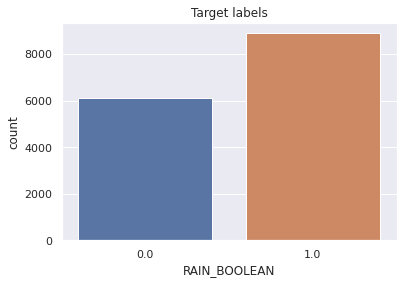

In [23]:
#We can see there are many Null values in the data , lets try to fill with proper values
sns.set(style="darkgrid")
sns.countplot(read_data.RAIN_BOOLEAN)
plt.title("Target labels")
plt.show()

<AxesSubplot:>

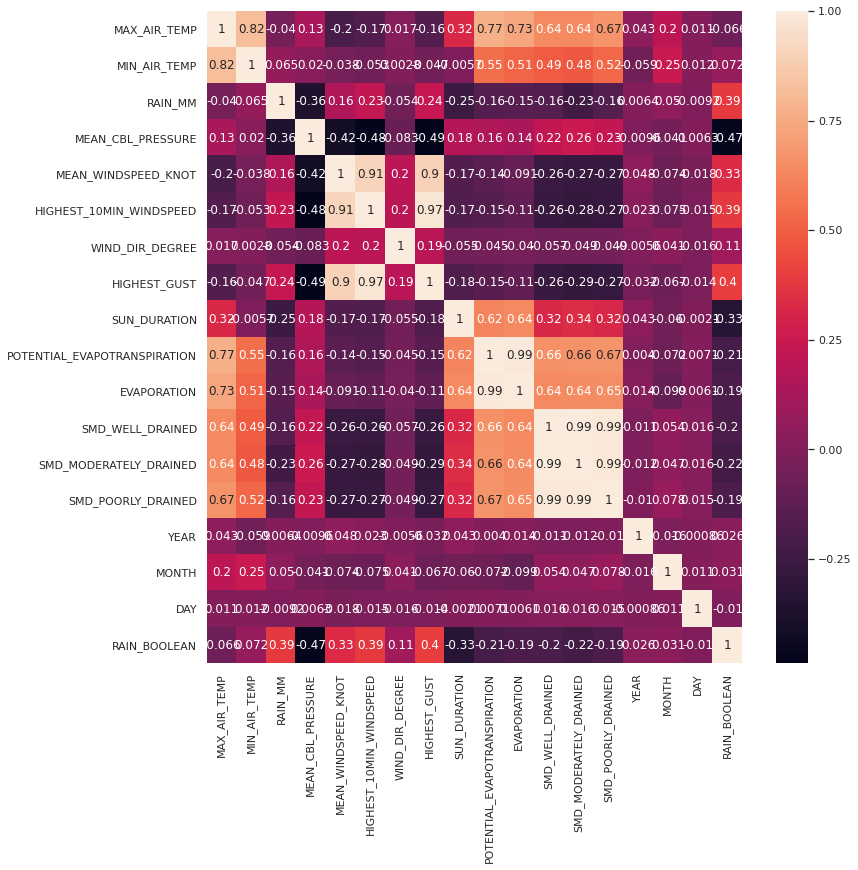

In [24]:
# Correlation between the data Dimensionss 
corrMatrix = read_data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True,)

# Logistic Regression Model

In [25]:
training_data = np.column_stack((np.array(read_data["MAX_AIR_TEMP"]),np.array(read_data["MIN_AIR_TEMP"]),
                                 np.array(read_data["MEAN_CBL_PRESSURE"]),np.array(read_data["MEAN_WINDSPEED_KNOT"]),
                                 np.array(read_data["HIGHEST_10MIN_WINDSPEED"]),np.array(read_data["WIND_DIR_DEGREE"]),
                                 np.array(read_data["HIGHEST_GUST"]),np.array(read_data["SUN_DURATION"]),
                                 np.array(read_data["EVAPORATION"])))

In [26]:
logisticReg = LogisticRegression(penalty="l1",max_iter = 200, solver = "liblinear") #max_iter alteration for different values
logisticReg.fit(training_data, target_Arr)
y_pred = logisticReg.predict(training_data)
intercept_value = logisticReg.intercept_
theta1 = logisticReg.coef_[0,0]
theta2 = logisticReg.coef_[0,1]
print("\nINTERCEPT VALUE :", intercept_value[0])
print("theta1 :", theta1)
print("theta2 :", theta2)
print("theta values: "+ str(logisticReg.coef_))


INTERCEPT VALUE : 45.56728186300404
theta1 : 0.04129315283124664
theta2 : 0.032502045781629844
theta values: [[ 0.04129315  0.03250205 -0.04715558 -0.12278601  0.08410048  0.00074215
   0.08029586 -0.15901737 -0.14343843]]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
logisticRegression_accuracy = accuracy_score(target_Arr,y_pred)
print(logisticRegression_accuracy)

0.7660226515656229


In [28]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(training_data, target_Arr, test_size=0.3)

In [29]:
#Create a svm Classifier
classifier = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_Pred = classifier.predict(X_test)

In [30]:
print("The Intercept Value: " + str(classifier.intercept_))

print("The Theta values: " + str(classifier.coef_))

The Intercept Value: [161.67995744]
The Theta values: [[ 0.0735399   0.08625664 -0.16372434 -0.19811348  0.12863027  0.00093313
   0.13581499 -0.27063385 -0.30146825]]


In [31]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_Pred))

Accuracy:  0.7628247834776816


In [32]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_Pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_Pred))

Precision:  0.7819575060954371
Recall:  0.8355042798660216


In [33]:
#read_data.to_excel("data_rough.xlsx")
#print("XLSX format file written for observation.")